In [1]:
import pandas as pd 
import numpy as np 
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Apply every step of text processing to your reviews

Read texts from restaurant comments file

In [2]:
text_data = pd.read_csv(os.getcwd()+'\Allresto.csv',encoding='ISO-8859-1',engine = 'python')

In [3]:
text_data.head()

,Restaurant Name,Review ID,Date,Content,Rating
0,Madhu's,739447935,20-Jan,The food was absolutely wonderful from prepara...,5
1,Madhu's,739773109,20-Jan,The food was amazing. Our waiter Franco was ex...,5
2,Madhu's,738529074,20-Jan,It was an awesome experience dining at the res...,5
3,Madhu's,739981237,20-Jan,"Excellent service, excellent food and great am...",5
4,Madhu's,740251404,20-Jan,Food was good cannot say too good but staff an...,4


Removing ponctuation

In [5]:
import re

In [6]:
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}

Preserve only strings with letters and numbers

In [7]:
def filter(x):
    y = x.translate(str.maketrans(transformation_dict)) 
    z = y.lower()
    clean_text = re.sub('[^A-Za-z0-9]+', ' ', z)
    return clean_text
text_data['Review_filtered'] = text_data.Content.apply(lambda x:filter(x))

In [8]:
text_data['Review_split'] = text_data.Review_filtered.apply(lambda x:nltk.word_tokenize(str(x)))

In [9]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 

Not sure to transform tense and participle by indicating 'v'

In [10]:
lemmatizer = WordNetLemmatizer()
def stem(words):
    return list(map(lambda x:lemmatizer.lemmatize(x,pos='v'),words))
text_data['Review_Stem'] = text_data.Review_split.apply(lambda x:stem(x))

Filter all stop words

In [11]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
my_stop_words = []
all_stop_words =  stop_words + my_stop_words

In [12]:
def filter_stopwords(words):
     return [word for word in words if word not in all_stop_words] 
text_data['Review-stopword'] = text_data.Review_Stem.apply(lambda x:filter_stopwords(x))

In [13]:
text_data.head()

,Restaurant Name,Review ID,Date,Content,Rating,Review_filtered,Review_split,Review_Stem,Review-stopword
0,Madhu's,739447935,20-Jan,The food was absolutely wonderful from prepara...,5,the food was absolutely wonderful from prepara...,"[the, food, was, absolutely, wonderful, from, ...","[the, food, be, absolutely, wonderful, from, p...","[food, absolutely, wonderful, preparation, pre..."
1,Madhu's,739773109,20-Jan,The food was amazing. Our waiter Franco was ex...,5,the food was amazing our waiter franco was exc...,"[the, food, was, amazing, our, waiter, franco,...","[the, food, be, amaze, our, waiter, franco, be...","[food, amaze, waiter, franco, exceptional, att..."
2,Madhu's,738529074,20-Jan,It was an awesome experience dining at the res...,5,it was an awesome experience dining at the res...,"[it, was, an, awesome, experience, dining, at,...","[it, be, an, awesome, experience, din, at, the...","[awesome, experience, din, restaurant, thursda..."
3,Madhu's,739981237,20-Jan,"Excellent service, excellent food and great am...",5,excellent service excellent food and great amb...,"[excellent, service, excellent, food, and, gre...","[excellent, service, excellent, food, and, gre...","[excellent, service, excellent, food, great, a..."
4,Madhu's,740251404,20-Jan,Food was good cannot say too good but staff an...,4,food was good cannot say too good but staff an...,"[food, was, good, can, not, say, too, good, bu...","[food, be, good, can, not, say, too, good, but...","[food, good, can, say, good, staff, service, e..."


Plot General Word Frequency

In [15]:
reviews = text_data['Review-stopword'].to_list()
all_words= [word for review in reviews for word in review]

In [16]:
from collections import Counter
word_frequency = Counter(all_words).most_common()
frequency = dict(word_frequency)

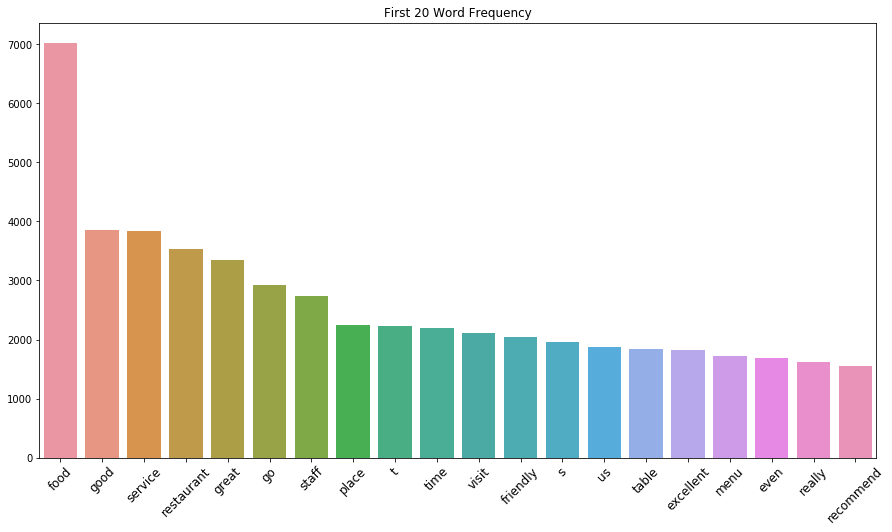

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(15,8))
sns.barplot(x = list(frequency.keys())[0:20],y = list(frequency.values())[0:20])
plt.title("First 20 Word Frequency")
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

## Create a TF-IDF Matrix with all the reviews scrapped on the web

Using TFIDF vector

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
reviews = text_data['Review-stopword'].to_list()
tokenized_reviews= [review for review in reviews]

In [22]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)    
tfidf_matrix = tfidf.fit_transform(tokenized_reviews)

In [23]:
word_list = tfidf.get_feature_names()
mean_tfidf = np.mean(tfidf_matrix,axis=1).ravel().tolist()[0]
avg_tfidf = dict(sorted(zip(word_list,mean_tfidf),key = lambda x: x[1],reverse=True))

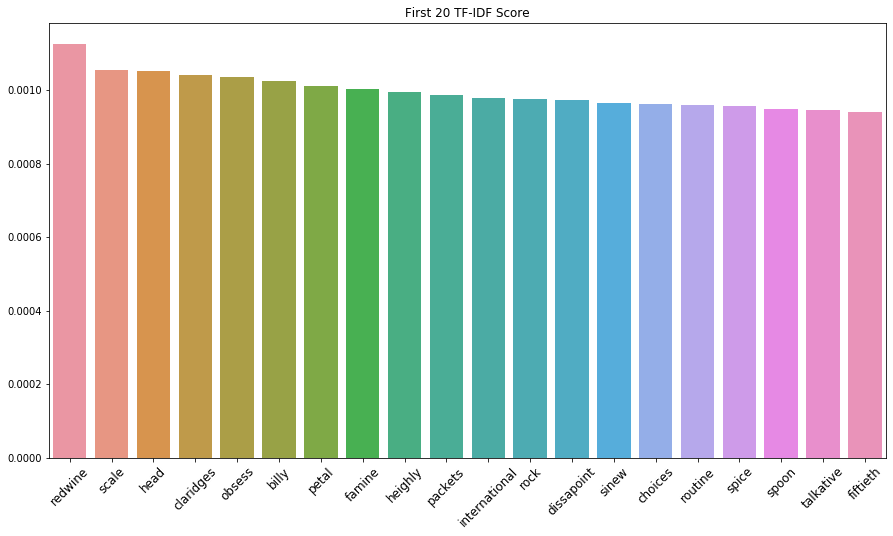

In [24]:
f = plt.figure(figsize=(15,8))
sns.barplot(x = list(avg_tfidf.keys())[0:20],y = list(avg_tfidf.values())[0:20])
plt.title("First 20 TF-IDF Score")
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

Import background picture to plot word frequency

In [26]:
from wordcloud import WordCloud
from PIL import Image

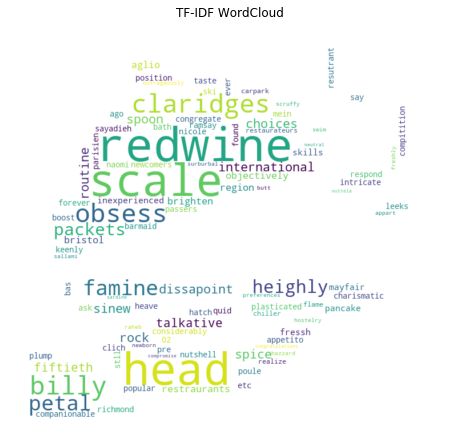

In [27]:
mask = np.array(Image.open("cook.jpg"))
wc = WordCloud(background_color="white", max_words=100, mask=mask)
        # generate word cloud
wc.generate_from_frequencies(avg_tfidf)
f = plt.figure(figsize=(8,8))
plt.title("TF-IDF WordCloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

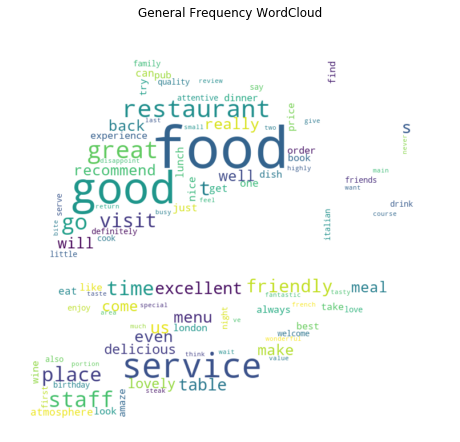

In [29]:
mask = np.array(Image.open("cook.jpg"))
wc = WordCloud(background_color="white", max_words=100, mask=mask)
        # generate word cloud
wc.generate_from_frequencies(frequency)
f = plt.figure(figsize=(8,8))
plt.title("General Frequency WordCloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bonus Question

### Question 1

In [37]:
characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", "(", ")", "-", "_","’","'", "\"", ":"]
transformation_dict = {initial:" " for initial in characters_to_remove}
with_accent = ['é', 'è', 'ê','à','ù','ô']
without_accent = ['e', 'e','e', 'a','u','o']
accent_dict = {before:after for before, after in zip(with_accent, without_accent)}

def filter(x):
    x1 = x.translate(str.maketrans(transformation_dict)) 
    x2 = x1.translate(str.maketrans(accent_dict))
    x3 = x2.lower()
    x4 = re.sub('[^A-Za-z0-9]+', ' ', x3)
    x5 = nltk.word_tokenize(str(x4))
    lemmatizer = WordNetLemmatizer()
    x6 = ''
    
    for m in x5:
        x6 = x6+(lemmatizer.lemmatize(m,pos='v'))+' '
    return x6


In [39]:
text_data['Bonus1'] = text_data.Content.apply(lambda x:filter(x))

### Question 2

In [47]:
from stop_words import get_stop_words
from collections import Counter

stop_words = get_stop_words('en')
my_stop_words = []
all_stop_words =  stop_words + my_stop_words


def plot_wordcloud(y):
    list_corpus= y.to_list()
    whole_corpus = ' '.join(list_corpus)
    whole_text = nltk.word_tokenize(str(whole_corpus))
    words = [word for word in whole_text if word not in all_stop_words] 
     
    word_frequency = Counter(words).most_common()
    frequency = dict(word_frequency)   
         
    mask = np.array(Image.open("capgemini.jpg"))
    wc = WordCloud(background_color="white", max_words=100, mask=mask)
            # generate word cloud
    wc.generate_from_frequencies(frequency)
    f = plt.figure(figsize=(8,8))
    plt.title("Frequency WordCloud")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

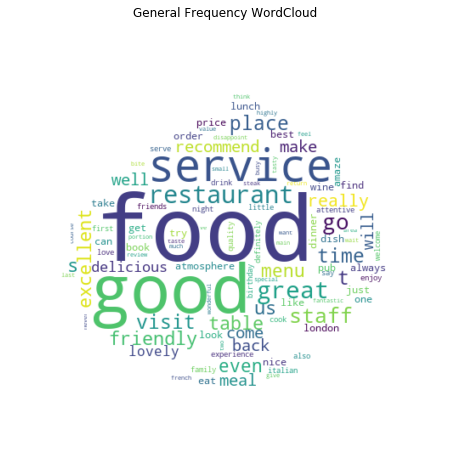

In [48]:
plot_wordcloud(text_data['Bonus1'])